# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy import stats
import statsmodels.stats.weightstats as smsw
import scipy.stats as sstats



In [2]:
df = pd.read_csv('human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### Q.1.Is the distribution of body temperatures normal?

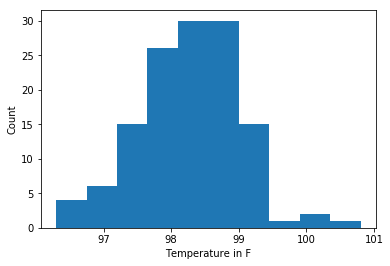

In [4]:
plt.hist(df['temperature'])     # using density instead of normed (deprecated)
plt.xlabel('Temperature in F')
plt.ylabel('Count')
plt.show()

By the shape of the histogram, the distribution appears to be almost normal.
Testing the normality by other means


In [5]:
# Calculating ECDF 
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [6]:
temp_mean = np.mean(df['temperature'])
temp_std = np.std(df['temperature'])

sample = np.random.normal(temp_mean, temp_std, size=1000000)


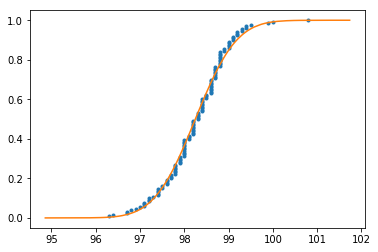

In [7]:
x_act, y_act = ecdf(df['temperature'])
x_sample, y_sample = ecdf(sample)
_ = plt.plot(x_act, y_act, linestyle = 'none', marker = '.')
_ = plt.plot(x_sample, y_sample)
plt.show()

From the above overlay of Sample and actual values , it appears that the distribution is almost normal. Verifying the same with a QQ plot


#### 1.b. Q-Q Plot

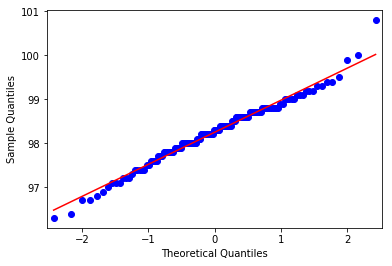

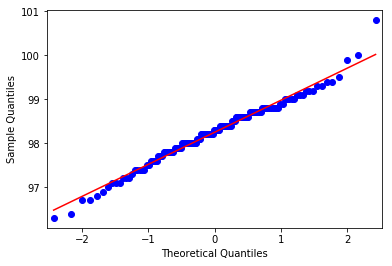

In [8]:
qqplot(df.temperature, line = 's')  

The value s is the standardized line drawn for reference.
The plot looks almost in line with the standardized line which shows the distribution is normal

#### 1.c. Shapiro-Wilk test for normality

 The Shapiro–Wilk test tests the null hypothesis that a sample came from a normally distributed population
 i.e., our null hypothesis of the sample being normally distributed to be true

In [9]:
stat, p = shapiro(df['temperature'])
print('The p-value of the test is :', p)

The p-value of the test is : 0.233174666762352


As the above p-value is much greater than 0.05(significance level), we cannot reject Null hypothesis.
In combination with above tests, it is safe to assume that the distribution is Normal.

#### 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [10]:
df['temperature'].count()

130

By applying the 10% rule, it can be reasonably assumed that 130 (number of temperature entries) is much less than 10%
of original dataset which probably has thousands of entries.

The n value (130) is greater than 30 by which we can conclude that the sample size is large

Also, each body temperature reading is independent of the next one as one's body temperature has no dependence
on another.

#### Q3.a. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.<br/>
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?<br/>
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?<br/>
Now try using the other test. How is the result be different? Why?<br/>

We proceed with the null and alternate hypothesis that 
$$H_0:\mu=98.6°F$$$$H_a: \mu\neq98.6°F$$

To resample available data to find out the mean of resampled data, we use bootstrapping

In [11]:
# Bootstrap replicate function
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

In [12]:
repl_temp = draw_bs_reps(df.temperature, np.mean, 1000)

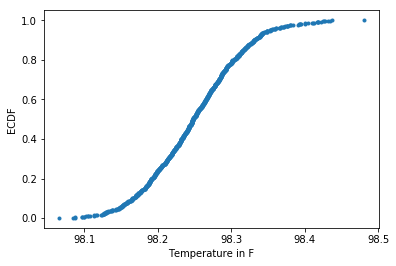

In [13]:
x_samp, y_samp = ecdf(repl_temp)
_ = plt.plot(x_samp, y_samp, linestyle = 'none', marker = '.')
_ = plt.xlabel('Temperature in F')
_ = plt.ylabel('ECDF')


plt.show()

Finding the confidence interval

In [14]:
conf_interval = np.percentile (repl_temp, [2.5,97.5])

print('The confidence interval is between : ',conf_interval[0], 'and', conf_interval[1])

The confidence interval is between :  98.12844230769231 and 98.38001923076925


As seen above the confidence interval (95%) is between 98.12 and 98.37 F while the Null hypothesis presuming is that
the mean is 98.6 F.
As the assumed average temperature does not lie in the confidence interval range, we reject the null hypothesis.
Therefore, the population mean temperature is not 98.6 F 

#### 3.b. Frequentist statistical testing. Would you use a one-sample or two-sample test? Why?


We use one sample test as we are testing the sample against one value

#### 3.c. In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?


•	For calculating proportions we use z-statistic <br/>
•	For calculating means, we use t statistic

The value of z is given by 

<img style="float: left;" 
src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/11/alternate-z-score.png">

Where xi is the sample mean, xbar is the assumed mean assuming null hypothesis is true,  S is the Standard error of the mean (standard deviation of sampling distribution of sample mean)

The denominator is equal to $\frac{\sigma}{\sqrt{n}}$, or the standard deviation of the population divided by the square root of the sample size. Since we don't know the value of $\sigma$,(as the dataset we are using is a sample) we estimate it using the sample standard deviation divided by Square root of n,  $$\frac{\bar{x}-\mu_\bar{x}}{\frac{s}{\sqrt{n}}}.$$ 
This approximation would give a better result with t-score

In [15]:
t_score = (np.mean(df['temperature']) - 98.6) /((np.std(df['temperature'])/np.sqrt(len(df))))
p = stats.norm.cdf(t_score)*2
print('The t-score is:', t_score)
print('p value of t_score is :', p)

The t-score is: -5.475925202078116
p value of t_score is : 4.3523151658821886e-08


The p value is approximately 0.00000004 which is much less than 0.05 (Signigicance level) and suggests that our null hypothesis is to be rejected

#### 3.d. Now try using the other test. How is the result be different? Why?

In [16]:
smsw.ztest(df['temperature'], value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

Although the t score and z score are almost the same, the correspond p-values differ. The p-value of z score is also much lower than 0.05 (significance level) 

#### Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
#### Which one is the correct one to use?
#### What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?


In [17]:
sample_10 = np.random.choice(df['temperature'], 10)

In [18]:
sample_10

array([98.4, 97.8, 99.1, 97.1, 97.4, 98.7, 97.9, 97.1, 97.8, 99.4])

In [19]:
s10_mean = np.mean(sample_10)
s10_std = np.std(sample_10)

t_score_sample10 = (s10_mean - 98.6) /(s10_std/np.sqrt(10))
p_value_t_sample_10 = stats.norm.cdf(t_score_sample10)*2
print('t-score:', t_score_sample10, 'p-value :', p_value_t_sample_10)

t-score: -2.1929678587355106 p-value : 0.02830969490275525


In [20]:
z_score_sample_10 = (s10_mean - 98.6) /(temp_std/np.sqrt(10))          # here the std deviation of population is used
p_value_z_sample_10 = stats.norm.cdf(z_score_sample_10)*2
print('z-score:',z_score_sample_10, 'p-value :', p_value_z_sample_10)

z-score: -2.294775530975979 p-value : 0.021745991625473436


For the t-score, the p-value is larger than the one obtained using z-score.


#### Q5. At what temperature should we consider someone's temperature to be "abnormal"?
#### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
#### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


Margin of error = z*s where S is standard error


Confidence interval = <img style="float: middle;" 
src= https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2009/10/t-dist.jpg>

In [21]:
ci_lower = temp_mean-(1.96)*(temp_std/np.sqrt(1))             # formula for 1 draw; Z value for 95% CI
ci_upper = temp_mean+(1.96)*(temp_std/np.sqrt(1))
print('The confidence interval by is :[', ci_lower, ',', ci_upper,']')

The confidence interval by is :[ 96.8177295225769 , 99.68073201588466 ]


In [22]:
moe = (1.96)*(temp_std/np.sqrt(1))                           # 1.96 is the z score for 95% CI
print('Marign of error is :', moe)

Marign of error is : 1.431501246653874


As calculated above, considering the 95% confidence interval and n=1 draw, the temperature range lies between 96.8 F and 99.6 F.
Any value outside this range (< 96.8 and > 99.6 can be considered abnormal.)

#### Q6. Is there a significant difference between males and females in normal temperature?
#### What testing approach did you use and why?
#### Write a story with your conclusion in the context of the original problem.

In [23]:
df['gender'].value_counts()

M    65
F    65
Name: gender, dtype: int64

The dataframe is equally divided between male and female population

In [24]:
male = df[['temperature', 'gender']]
temp_male = male.loc[male.gender == 'M']
temp_male = temp_male.drop(['gender'], axis =1)
temp_male = np.array(temp_male['temperature'])

female = df[['temperature', 'gender']]
temp_female = female.loc[female.gender == 'F']
temp_female = temp_female.drop(['gender'], axis =1)
temp_female = np.array(temp_female['temperature'])

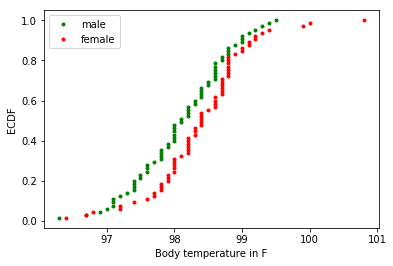

In [25]:
male_temp_val, male_temp_ind = ecdf(temp_male)
female_temp_val, female_temp_ind = ecdf(temp_female)

_ = plt.plot(male_temp_val, male_temp_ind, color = 'green', marker = '.', linestyle = 'none')
_ = plt.plot(female_temp_val, female_temp_ind, color = 'red', marker = '.', linestyle = 'none')
_ = plt.xlabel('Body temperature in F')
_ = plt.ylabel('ECDF')
_ = plt.legend(['male', 'female'], loc='upper left')
plt.show()

Clearly, both the CDF values are different which indicates there is difference between male and female temperatures

ECDF was calculated for both values and overlaid on same graph to check variation